## Importando bibliotecas necessárias para o entregável

In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

## Trazendo os dados para o nosso ambiente

In [385]:
arquivos = ['vendas_linha_petshop_2019.csv', 'vendas_linha_petshop_2020.csv', 'vendas_linha_petshop_2021.csv', 'vendas_linha_petshop_2022.csv']

vendas = pd.concat([pd.read_csv(arq, sep = ';', decimal = ',', encoding = 'latin-1') for arq in arquivos], ignore_index=True)


In [386]:
vendas.head(5)

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,1,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,13/06/2019,Acre,Dinheiro,Rapid Pink,Carlos,0.44,17.6,Alimentação
1,2,Norte,Biscoito True Champion 300g,21.0,2.0,42.0,03/01/2019,Amapá,Pix,Rapid Pink,Maria Linda,0.42,16.8,Alimentação
2,3,Norte,Biscoito True Champion 300g,22.0,NaN,44.0,18/01/2019,Pará,Boleto Bancário,Rapid Pink,Julia,0.88,35.2,Alimentação
3,4,Norte,Biscoito True Champion 300g,19.0,4.0,88.0,19/08/2019,Rondônia,Boleto Bancário,Rapid Pink,Yuri,0.76,30.4,Alimentação
4,5,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,18/10/2019,Tocantins,Cartão Crédito,Rapid Pink,Dolores,0.44,17.6,Alimentação


In [387]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200786 entries, 0 to 200785
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cod_pedido           200786 non-null  int64  
 1   regiao_pais          200786 non-null  object 
 2   produto              200786 non-null  object 
 3   valor                200786 non-null  float64
 4   quantidade           200266 non-null  object 
 5   valor_total_bruto    200786 non-null  float64
 6   data                 200786 non-null  object 
 7   estado               200786 non-null  object 
 8   formapagto           200786 non-null  object 
 9   centro_distribuicao  200786 non-null  object 
 10  responsavelpedido    200786 non-null  object 
 11  valor_comissao       200786 non-null  float64
 12  lucro_liquido        200786 non-null  float64
 13  categoriaprod        200786 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 21.4+ MB


## Questão 2

In [388]:
# Criando uma cópia da tabela original para manipulação relevante apenas para a Questão 2

vendas_q2 = vendas.copy()

In [389]:
# Transformando a coluna 'quantidade' em uma coluna numérica

vendas_q2['quantidade'] = pd.to_numeric(vendas_q2['quantidade'], errors='coerce')

In [390]:
# Visualização de estatísticas básicas antes de qualquer tratamento

vendas_q2['quantidade'].describe()

count    200119.000000
mean          3.650638
std          12.045057
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         110.000000
Name: quantidade, dtype: float64

In [391]:
# Cálculo da porcentagem de missing values que temos na coluna 'quantidade'

vendas_q2['quantidade'].isna().sum() * 100 / len(vendas_q2)

0.3321944757104579

In [392]:
# Como temos menos de 1% de missing values, desconsiderá-los em nossa análise é um método viável nesse caso

linhas_antes = vendas_q2.shape[0]

vendas_q2 = vendas_q2.dropna(subset=['quantidade'])

linhas_depois = vendas_q2.shape[0]

excluidas = linhas_antes - linhas_depois

print(f"Foram excluídos {excluidas} registros.")

Foram excluídos 667 registros.


In [393]:
# Visualização de estatísticas básicas após tratamento de missing values

vendas_q2['quantidade'].describe()

count    200119.000000
mean          3.650638
std          12.045057
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         110.000000
Name: quantidade, dtype: float64

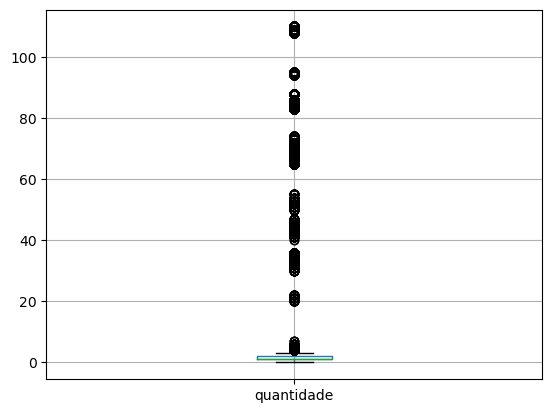

In [394]:
# Desvio padrão que 4x a média e valor máximo 55x o o valor do 3Q, indicativos de possíveis outliers

# Visualização dos dados de quantidade em um gráfixo box-plot para verificação da existência de outliers

vendas_q2[['quantidade']].boxplot()
plt.show()

In [395]:
# Obtenção dos percentis para winsorização

valores_wins = vendas_q2['quantidade'].quantile([0.06, 0.94]).to_list()

# Winsorização dos valores abaixo ou acima do 6% e 94%

vendas_q2['quantidade_wins'] = vendas_q2['quantidade'].clip(valores_wins[0], valores_wins[1])

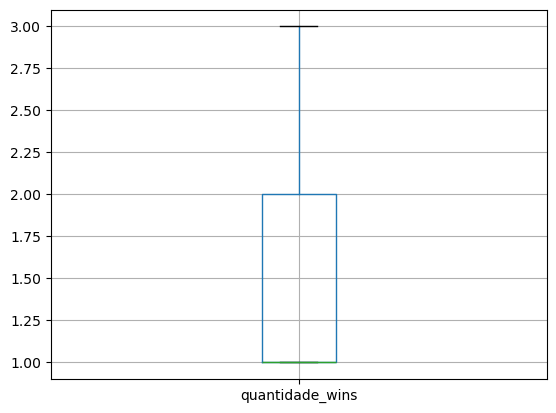

count    200119.000000
mean          1.658088
std           0.821446
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: quantidade_wins, dtype: float64

In [396]:
# Visualização dos dados winsorizados para checar se ainda existem outliers

vendas_q2[['quantidade_wins']].boxplot()
plt.show()

# Visualização de estatísticas básicas após tratamento de outliers

vendas_q2['quantidade_wins'].describe()

In [397]:
# Classificando outliers utilizando IQR

Q1 = vendas_q2['quantidade'].quantile(0.25)
Q3 = vendas_q2['quantidade'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_IQR = vendas_q2[(vendas_q2['quantidade'] < limite_inferior) | (vendas_q2['quantidade'] > limite_superior)]

outliers_IQR.sort_values('quantidade')


,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,quantidade_wins
3,4,Norte,Biscoito True Champion 300g,19.00,4.0,88.00,19/08/2019,Rondônia,Boleto Bancário,Rapid Pink,Yuri,0.76,30.4,Alimentação,3.0
151001,151196,Nordeste,Biscoito True Champion 300g,35.64,4.0,142.56,11/04/2022,Paraíba,Cartão Débito,Gold Beach,Cristina,3.52,35.2,Alimentação,3.0
151003,151198,Sudeste,Biscoito True Champion 300g,37.26,4.0,149.04,13/02/2022,Piauí,Dinheiro,Gold Beach,Cristian,3.68,36.8,Alimentação,3.0
79626,79627,Sul,Bola Pet Vinil Big Blue,22.40,4.0,89.60,11/04/2020,Rio Grande do Sul,Dinheiro,Tree True,Vivian,1.60,32.0,Brinquedo,3.0
79619,79620,Sudeste,Bola Pet Vinil Big Blue,20.16,4.0,80.64,08/05/2020,Piauí,Cartão Débito,Papa Léguas,Cristian,1.44,28.8,Brinquedo,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27886,27887,Norte,"Ração Royal Canin Exigent Gatos Adultos 1,5Kg",100.00,110.0,11000.00,23/09/2019,Rondônia,Cartão Crédito,Rapid Pink,Yuri,215.60,5390.0,Alimentação,3.0
22355,22356,Sul,Shampoo vegano para cachorro e gato de camomil...,23.00,110.0,2530.00,02/04/2019,Paraná,Pix,Tree True,Beatriz,55.00,2200.0,Higiene e Limpeza,3.0
28060,28061,Norte,Bandana Disney Mickey Fábrica Petti,11.00,110.0,1210.00,21/11/2019,Pará,Cartão Débito,Rapid Pink,Julia,28.60,1001.0,Acessório,3.0
21147,21148,Nordeste,Shampoo vegano para cachorro e gato de camomil...,24.00,110.0,2640.00,16/11/2019,Maranhão,Cartão Crédito,Gold Beach,Clarice,69.30,1848.0,Higiene e Limpeza,3.0


In [398]:
# Outra maneira de classificar outliers (Z score)

vendas_q2['quantidade_z'] = scale(vendas_q2['quantidade'])

# -3 e +3 utilizados como limites de Z Score para configuração de outlier

outliers_z = vendas_q2[(vendas_q2['quantidade_z'] > 3) | (vendas_q2['quantidade_z'] < -3)]

outliers_z.sort_values('quantidade_z')

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,quantidade_wins,quantidade_z
101815,102010,Norte,Biscoito True Champion 300g,27.93,40.0,1117.20,02/11/2021,Amazonas,Cartão Crédito,Rapid Pink,Silvia,16.80,336.00,Alimentação,3.0,3.017790
150419,150614,Centro Oeste,Bola Pet Vinil Big Blue,30.78,40.0,1231.20,26/02/2022,Mato Grosso,Cartão Débito,Grãos Blue,Andressa,7.60,304.00,Brinquedo,3.0,3.017790
194063,194258,Norte,Whiskas Petisco Temptations Anti Bola de Pelo 40g,11.34,41.0,464.94,27/02/2022,Pará,Boleto Bancário,Rapid Pink,Julia,6.15,61.50,Petisco,3.0,3.100812
199896,200091,Centro Oeste,Kit Banho e Tosa com Escova PetShop Cãopeon,103.68,41.0,4250.88,07/04/2022,Distrito Federal,Cartão Débito,Grãos Blue,Lucia,129.15,2066.40,Higiene e Limpeza,3.0,3.100812
199820,200015,Centro Oeste,Suplemento Alimentar Glutamina Mundo Animal Nu...,59.94,41.0,2457.54,01/03/2022,Mato Grosso do Sul,Dinheiro,Grãos Blue,Ligia,40.59,744.15,Medicamento,3.0,3.100812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18748,18749,Nordeste,Shampoo vegano para cachorro e gato de camomil...,22.00,110.0,2420.00,14/03/2019,Paraíba,Cartão Crédito,Gold Beach,Cristina,72.60,1936.00,Higiene e Limpeza,3.0,8.829317
18560,18561,Norte,Penas Gatito,17.00,110.0,1870.00,23/06/2019,Pará,Cartão Crédito,Rapid Pink,Julia,16.50,1188.00,Brinquedo,3.0,8.829317
25769,25770,Nordeste,Penas Gatito,15.00,110.0,1650.00,25/10/2019,Alagoas,Dinheiro,Gold Beach,Marta,18.70,1346.40,Brinquedo,3.0,8.829317
22877,22878,Sudeste,Vitamina E Granulado BigForce,56.00,110.0,6160.00,08/04/2019,Minas Gerais,Cartão Crédito,Papa Léguas,Monique,330.00,4537.50,Medicamento,3.0,8.829317


### Discussão relevante:
#### Utilizando IQR chegamos em 11283 outliers na coluna 'quantidade', com valores variando entre 4 e 110
#### Utilizando Z Score, chegamos em 4762 outliers, variando entre 40 e 110

##### Em nosso caso, muito provavelmente compras de dezenas e centenas de produtos são compras realizadas por lojas/empresas (atacado) e compras unitárias são realizadas por pessoas físicas (varejo). Considerando que a esmagadora maioria dos registros são de compras unitárias (em torno de 97%), vale o questionamento: o que configura um outlier? Compras de 4 unidades (IQR) muito provavelmente ainda são de varejo, enquanto compras de menos de 40 produtos (Z Score) (25, 30, entre outros exemplos), muito provavelmente são de atacado

## Resposta - Questão 2
##### Sim, existem outliers nos dados da coluna 'quantidade'. Sim, é possível notar que essas vendas são de valores bastante elevados e também de grande quantidade de produtos, provavelmente sendo compras realizadas por outras empresas. Sem a winsorização, encontramos um desvio padrão próximo de 12 para a coluna quantidade. Após a winsorização e consequente tratamento de todos os possíveis outliers (valor máximo deixou de ser 110 e passou a ser 3), o novo desvio padrão é próximo de 0,82.

# Questão 3

In [399]:
# Criando uma cópia da tabela original para manipulação relevante apenas para a Questão 3

vendas_q3 = vendas.copy()

In [400]:
# Cálculo da porcentagem de missing values que temos nas colunas de interesse

colunas = ['valor', 'regiao_pais', 'formapagto']

valores_nan = pd.DataFrame({
    'coluna': colunas,
    'numero_NaNs': [vendas_q3[col].isna().sum() for col in colunas],
    'percentual_NaNs': [vendas_q3[col].isna().sum() / len(vendas_q3) * 100 for col in colunas]
})

valores_nan


,coluna,numero_NaNs,percentual_NaNs
0,valor,0,0.0
1,regiao_pais,0,0.0
2,formapagto,0,0.0


In [401]:
# Cálculo da média de preço da população geral

media_geral = vendas_q3['valor'].mean().round(2)
total_registros = len(vendas_q3)

media_geral

111.09

In [402]:
# Cálculo da média de preço por região

media_por_regiao = vendas_q3.groupby('regiao_pais').agg(Media_Valor=('valor', 'mean'), Quantidade=('valor', 'count')).reset_index()
media_por_regiao['Media_Valor'] = media_por_regiao['Media_Valor'].round(2)

media_por_regiao

,regiao_pais,Media_Valor,Quantidade
0,Centro Oeste,111.23,32121
1,Nordeste,111.10,48205
2,Norte,111.10,56198
3,Sudeste,111.08,40167
4,Sul,110.87,24095


In [403]:
# Cálculo da média de preço por forma de pagamento

media_por_formapagto = vendas_q3.groupby('formapagto').agg(Media_Valor=('valor', 'mean'), Quantidade=('valor', 'count')).reset_index()
media_por_formapagto['Media_Valor'] = media_por_formapagto['Media_Valor'].round(2)

media_por_formapagto

,formapagto,Media_Valor,Quantidade
0,Boleto Bancário,110.59,40281
1,Cartão Crédito,112.51,40507
2,Cartão Débito,109.63,40032
3,Dinheiro,111.48,39792
4,Pix,111.23,40174


## Resposta - Questão 3
##### Não houve diferença estatisticamente relevante entre a média de preço entre a média geral da população e a média de qualquer região ou qualquer forma de pagamento. Os valores mais distantes da média geral foram os de compras realizadas por cartão (crédito 1,02% maior e débito 1,31% menor), nenhum configurando uma diferença relevante.

# Questão 4

In [404]:
# Criando uma cópia da tabela original para manipulação relevante apenas para a Questão 4

vendas_q4 = vendas.copy()

In [405]:
vendas_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200786 entries, 0 to 200785
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cod_pedido           200786 non-null  int64  
 1   regiao_pais          200786 non-null  object 
 2   produto              200786 non-null  object 
 3   valor                200786 non-null  float64
 4   quantidade           200266 non-null  object 
 5   valor_total_bruto    200786 non-null  float64
 6   data                 200786 non-null  object 
 7   estado               200786 non-null  object 
 8   formapagto           200786 non-null  object 
 9   centro_distribuicao  200786 non-null  object 
 10  responsavelpedido    200786 non-null  object 
 11  valor_comissao       200786 non-null  float64
 12  lucro_liquido        200786 non-null  float64
 13  categoriaprod        200786 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 21.4+ MB


In [406]:
# Colunas que devem ser consideradas na matriz de correlação:
# valor, quantidade, valor_total_bruto, valor_comissao, lucro_liquido

# Transformando a coluna quantidade em numérica

vendas_q4['quantidade'] = pd.to_numeric(vendas_q4['quantidade'], errors='coerce')

colunas_numericas = ['valor', 'quantidade', 'valor_total_bruto', 'valor_comissao', 'lucro_liquido']

resumo_nan = pd.DataFrame({
    'coluna': colunas_numericas,
    'numero_NaN': vendas_q4[colunas_numericas].isna().sum().values,
    'percentual_NaN': (vendas_q4[colunas_numericas].isna().sum() / len(vendas_q4) * 100).values
})

resumo_nan

,coluna,numero_NaN,percentual_NaN
0,valor,0,0.000000
1,quantidade,667,0.332194
2,valor_total_bruto,0,0.000000
3,valor_comissao,0,0.000000
4,lucro_liquido,0,0.000000


In [407]:
# Como já abordado na questão 2, exclusão de registros com NaN na coluna 'quantidade'

linhas_antes = vendas_q4.shape[0]

vendas_q4 = vendas_q4.dropna(subset=['quantidade'])

linhas_depois = vendas_q4.shape[0]

excluidas = linhas_antes - linhas_depois

print(f"Foram excluídos {excluidas} registros.")

Foram excluídos 667 registros.


In [408]:
# Cálculo da matriz de correlação das variáveis numéricas

pearson = vendas_q4[['valor', 'quantidade', 'valor_total_bruto', 'valor_comissao', 'lucro_liquido']].corr()

# matriz ajustada
pearson.style.background_gradient(cmap='coolwarm').format("{:.2f}")

,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido
valor,1.00,-0.01,0.06,0.21,0.19
quantidade,-0.01,1.00,0.12,0.32,0.56
valor_total_bruto,0.06,0.12,1.00,0.26,0.26
valor_comissao,0.21,0.32,0.26,1.00,0.89
lucro_liquido,0.19,0.56,0.26,0.89,1.00


## Resposta - Questão 4
##### Não há nenhuma forte correlação negativa em nossa matriz de correlação, porém existem duas fortes positivas, uma muito forte inclusive. As colunas quantidade e lucro_liquido apresentam um indice de correlação de 0.56 (forte) e as colunas valor_comissao e lucro_liquido 0.89 (muito forte).